<a href="https://colab.research.google.com/github/FerPaye01/Challenge-Telecom-X-1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

print("Bibliotecas importadas correctamente.")


Bibliotecas importadas correctamente.


#📌 Extracción

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    with open('TelecomX_Data.json', 'r') as f:
        json_data = pd.read_json(f)
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el mismo directorio.")
    exit()

df = pd.json_normalize(json_data.to_dict('records'), sep='_')


In [21]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

#🔧 Transformación

In [22]:
# Conversión y limpieza de datos
df['TotalCharges'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
mediana_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(mediana_total_charges, inplace=True)
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

# Renombrar columnas a español
columnas_esp = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Adulto_Mayor',
    'customer_Partner': 'Tiene_Pareja',
    'customer_Dependents': 'Tiene_Dependientes',
    'customer_tenure': 'Meses_Contrato',
    'phone_PhoneService': 'Servicio_Telefonico',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Peliculas',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Facturacion_Sin_Papel',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges_Monthly': 'Facturacion_Mensual'
}
df.rename(columns=columnas_esp, inplace=True)
df.drop(columns=['account_Charges_Total'], inplace=True, errors='ignore')

# Codificación de variables categóricas binarias
mapeo_binario = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}
cols_a_mapear = [
    'Evasion', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico',
    'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
    'Streaming_Peliculas', 'Facturacion_Sin_Papel'
]
for col in cols_a_mapear:
    if col in df.columns:
        df[col] = df[col].replace(mapeo_binario)

# Codificación de género
df['Genero'] = df['Genero'].replace({'Male': 1, 'Female': 0})


/tmp/ipython-input-3115062238.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-3115062238.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario)
/tmp/ipython-input-3115062238.p

#📊 Carga y análisis

In [25]:
# Estadísticas descriptivas
print("Estadísticas Descriptivas:")
display(df.describe())



Estadísticas Descriptivas:


,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Sin_Papel,Facturacion_Mensual,TotalCharges,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2279.287581,2.157337
std,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2267.178963,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,1.180833
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


/tmp/ipython-input-3366645989.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasion', data=df, palette=palette_colores)


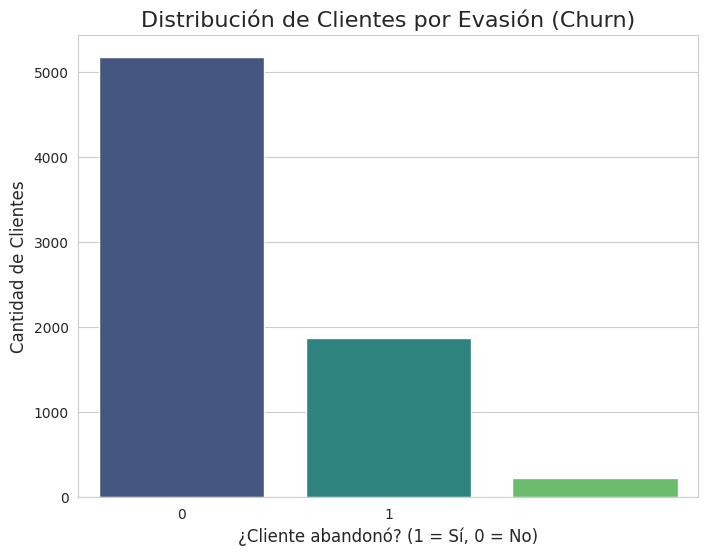

In [27]:

# Configuración de estilo para visualizaciones
sns.set_style("whitegrid")
palette_colores = "viridis"

# Gráfico: Distribución de Evasión
plt.figure(figsize=(8, 6))
sns.countplot(x='Evasion', data=df, palette=palette_colores)
plt.title('Distribución de Clientes por Evasión (Churn)', fontsize=16)
plt.xlabel('¿Cliente abandonó? (1 = Sí, 0 = No)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.show()


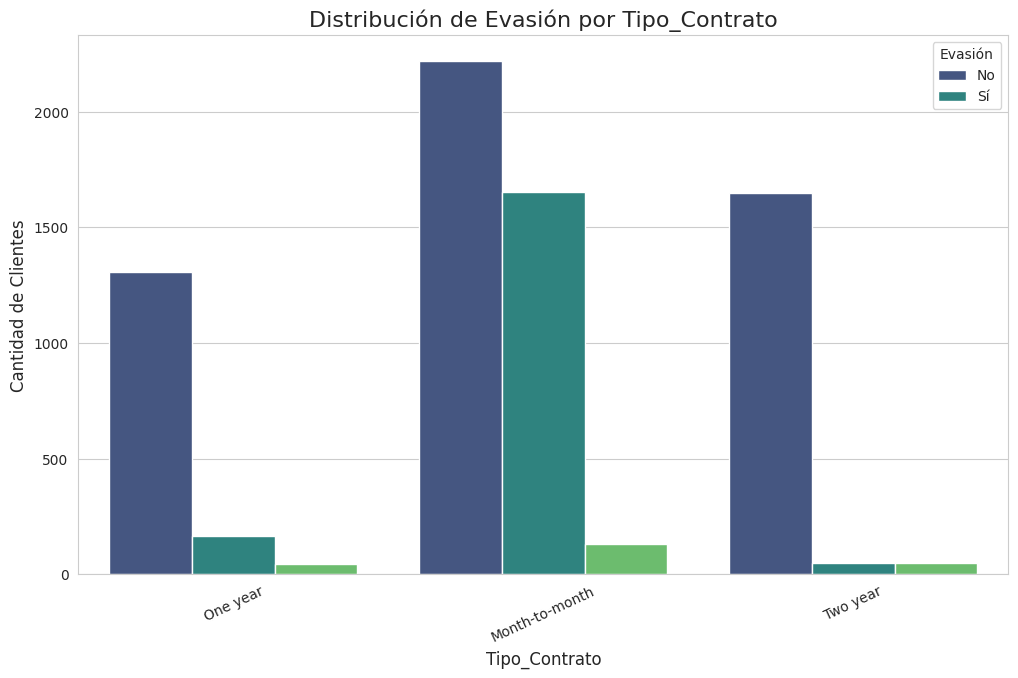

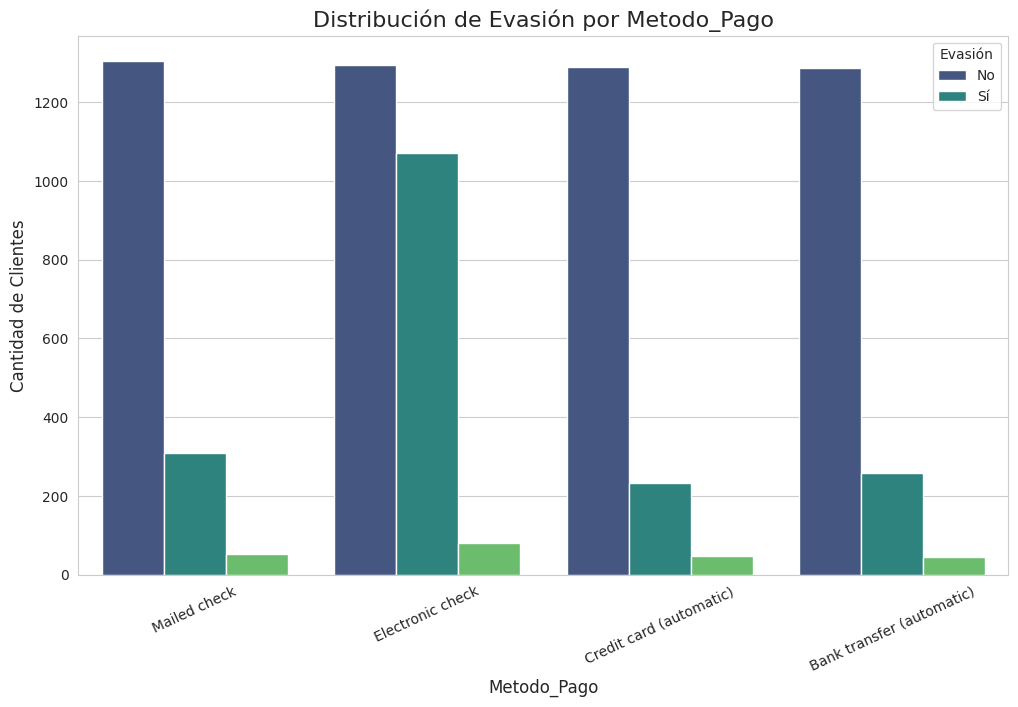

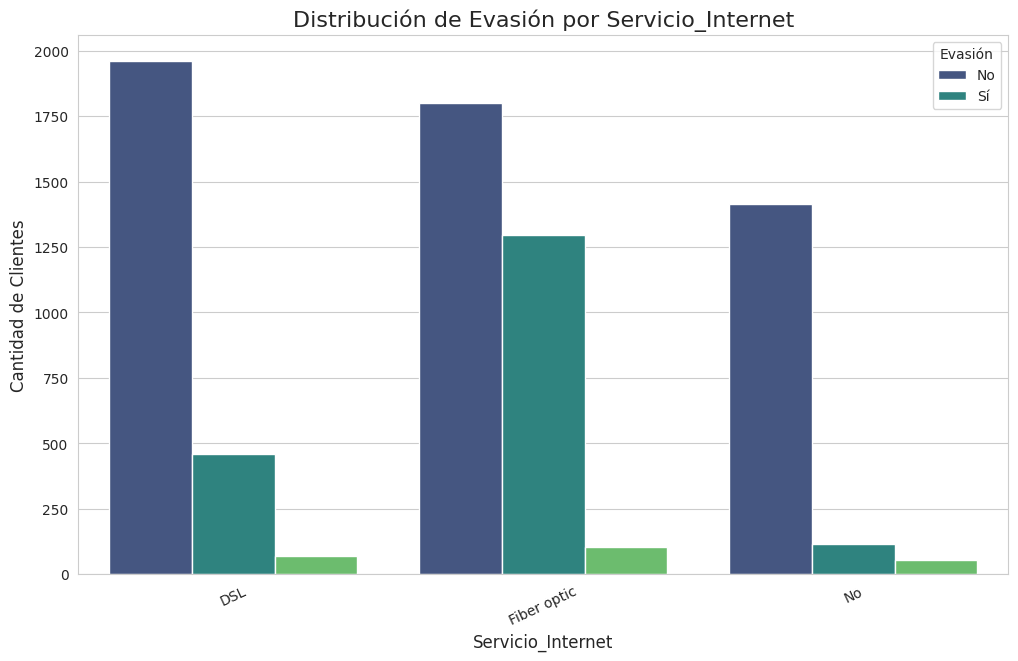

In [28]:

# Gráficos: Variables categóricas vs Evasión
variables_categoricas = ['Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet']
for var in variables_categoricas:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=var, hue='Evasion', data=df, palette=palette_colores)
    plt.title(f'Distribución de Evasión por {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(rotation=25)
    plt.legend(title='Evasión', labels=['No', 'Sí'])
    plt.show()


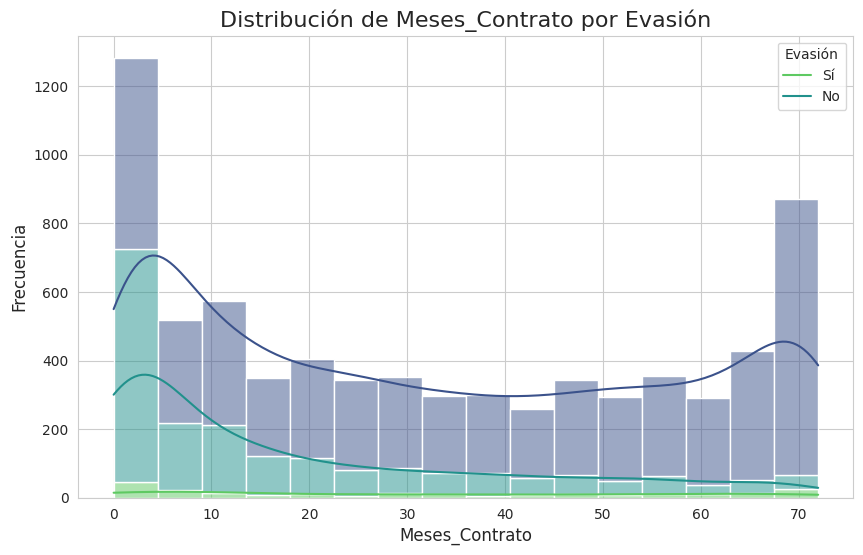

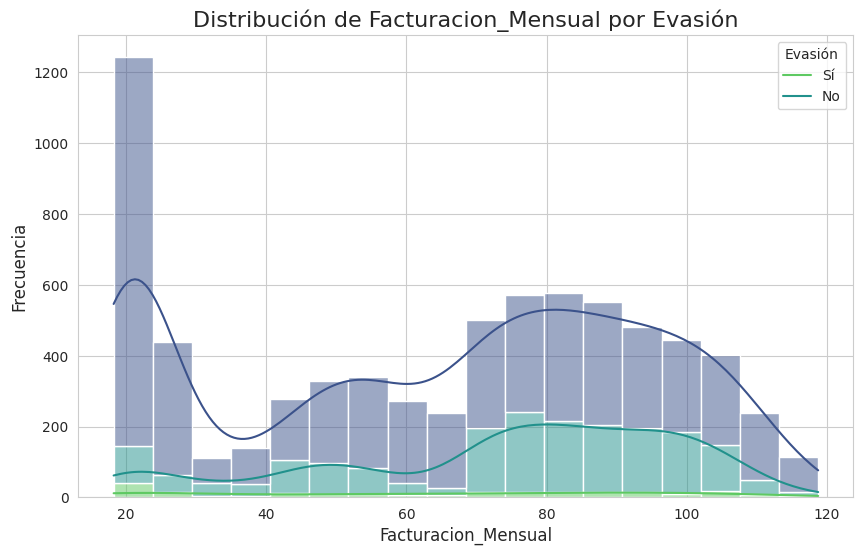

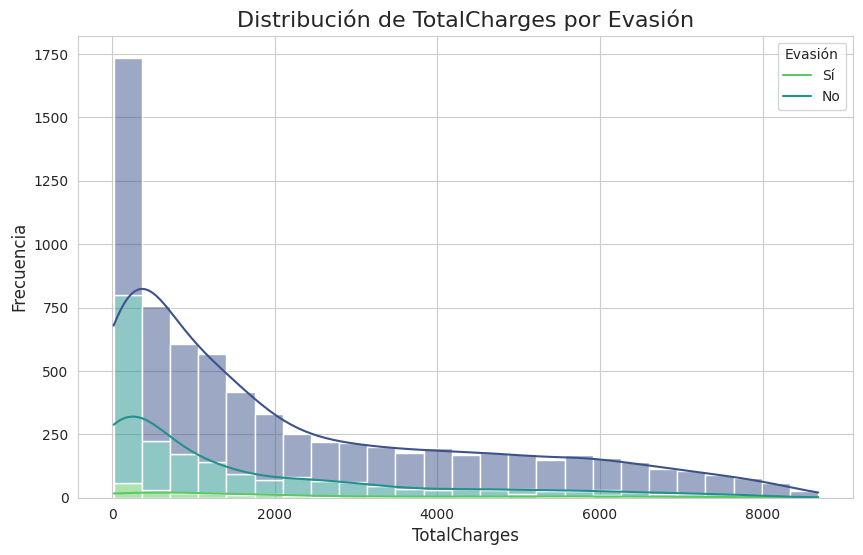

In [29]:

# Gráficos: Variables numéricas vs Evasión
variables_numericas = ['Meses_Contrato', 'Facturacion_Mensual', 'TotalCharges']
for var in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, hue='Evasion', multiple='stack', palette=palette_colores, kde=True)
    plt.title(f'Distribución de {var} por Evasión', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(title='Evasión', labels=['Sí', 'No'])
    plt.show()


In [31]:
# --- Matriz de correlación ---

# Copia del DataFrame original
df_corr = df.copy()


In [32]:
print(df_corr.dtypes)


ID_Cliente                 object
Evasion                    object
Genero                      int64
Adulto_Mayor                int64
Tiene_Pareja                int64
Tiene_Dependientes          int64
Meses_Contrato              int64
Servicio_Telefonico         int64
Multiples_Lineas            int64
Servicio_Internet          object
Seguridad_Online            int64
Respaldo_Online             int64
Proteccion_Dispositivo      int64
Soporte_Tecnico             int64
Streaming_TV                int64
Streaming_Peliculas         int64
Tipo_Contrato              object
Facturacion_Sin_Papel       int64
Metodo_Pago                object
Facturacion_Mensual       float64
TotalCharges              float64
Cuentas_Diarias           float64
dtype: object


In [33]:


# Asegurar que 'Evasion' sea numérica
df_corr['Evasion'] = pd.to_numeric(df_corr['Evasion'], errors='coerce')

# Codificación dummies para variables categóricas
columnas_para_dummies = ['Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet']
columnas_para_dummies = [col for col in columnas_para_dummies if col in df_corr.columns]
df_corr = pd.get_dummies(df_corr, columns=columnas_para_dummies, drop_first=True)

# Eliminar columnas no numéricas como ID_Cliente si existen
if 'ID_Cliente' in df_corr.columns:
    df_corr.drop(columns=['ID_Cliente'], inplace=True)

# Filtrar solo columnas numéricas
df_corr_numerico = df_corr.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = df_corr_numerico.corr()

# Mostrar correlación con la variable 'Evasion'
if 'Evasion' in matriz_corr.columns:
    corr_evasion = matriz_corr['Evasion'].sort_values(ascending=False)
    print("\nCorrelación de las variables con la Evasión:")
    print(corr_evasion)




Correlación de las variables con la Evasión:
Evasion                   1.000000
Facturacion_Mensual       0.193356
Cuentas_Diarias           0.193356
Facturacion_Sin_Papel     0.191825
Adulto_Mayor              0.150889
Streaming_TV              0.063228
Streaming_Peliculas       0.061382
Multiples_Lineas          0.040102
Servicio_Telefonico       0.011942
Genero                   -0.008612
Proteccion_Dispositivo   -0.066160
Respaldo_Online          -0.082255
Tiene_Pareja             -0.150448
Tiene_Dependientes       -0.164221
Soporte_Tecnico          -0.164674
Seguridad_Online         -0.171226
TotalCharges             -0.199034
Meses_Contrato           -0.352229
Name: Evasion, dtype: float64


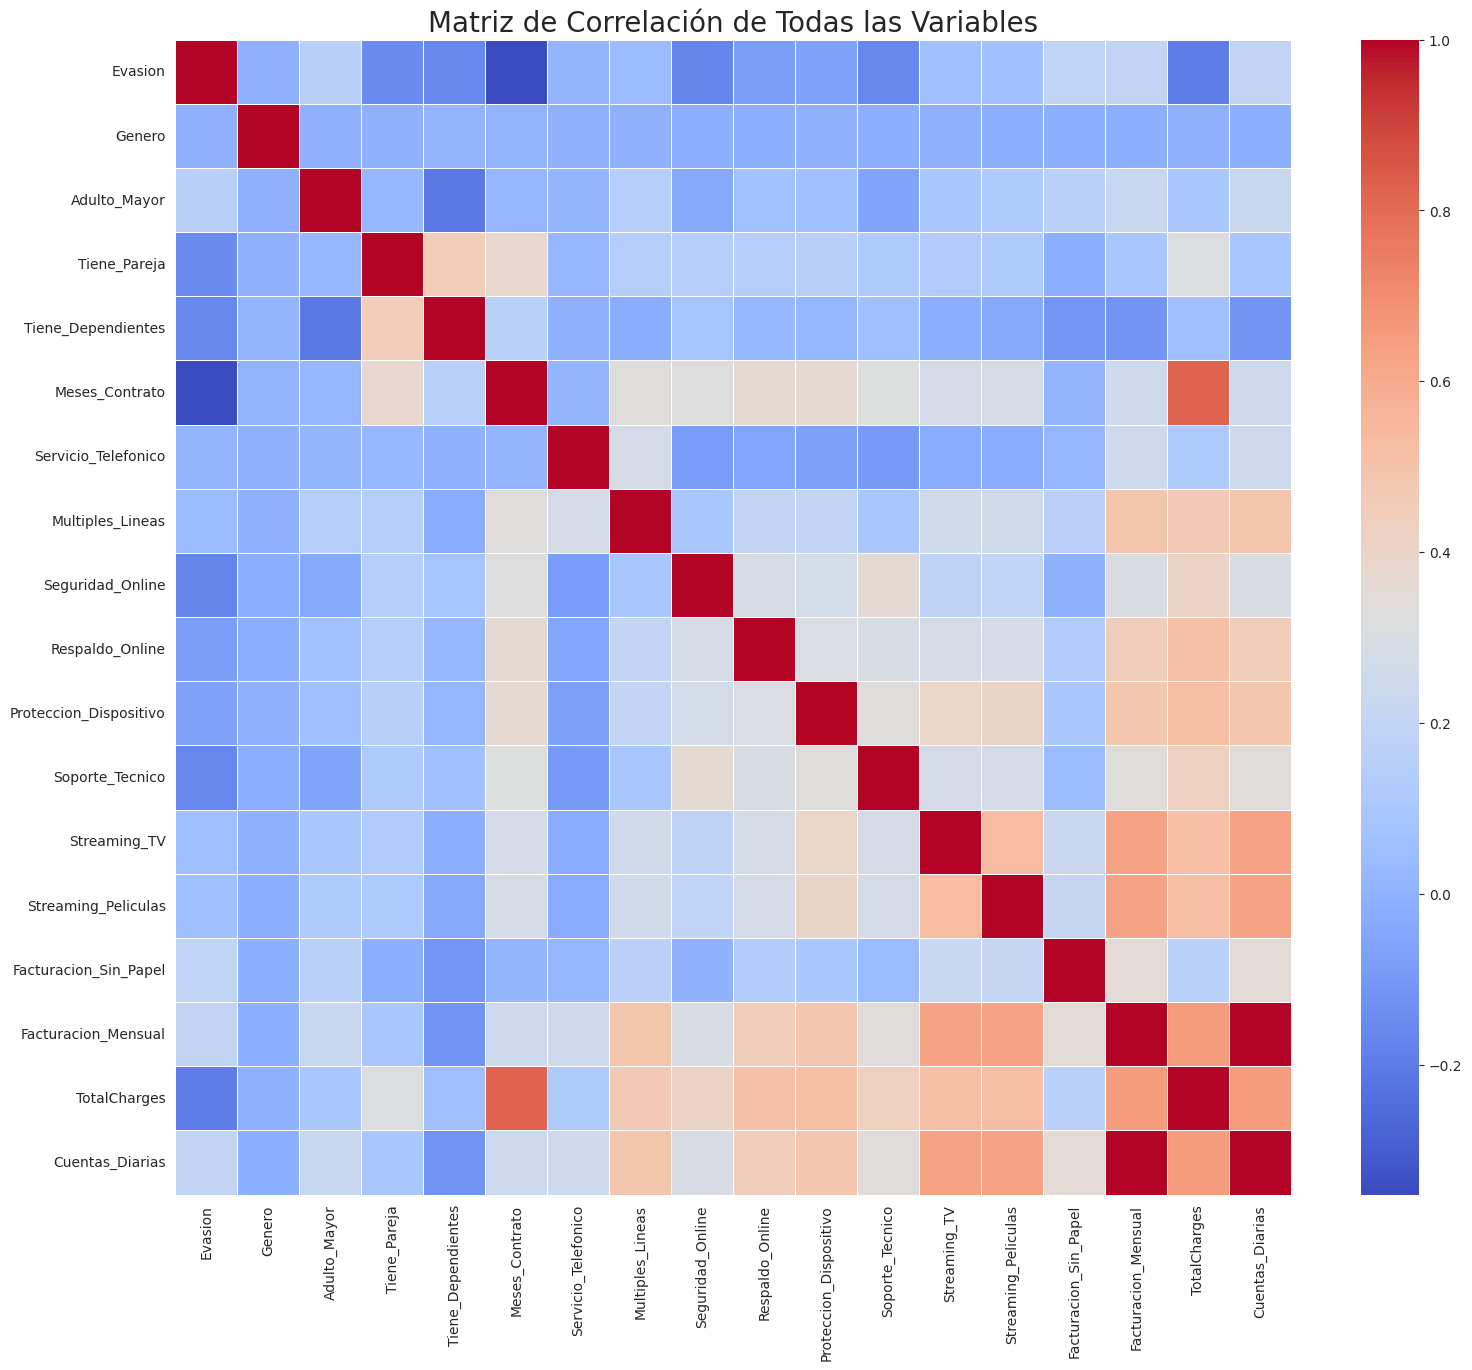


Análisis completado.


In [34]:
# Heatmap de la matriz de correlación
plt.figure(figsize=(18, 15))
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables', fontsize=20)
plt.show()

print("\nAnálisis completado.")

In [35]:
df.to_csv("datos_tratados.csv", index=False)


In [36]:
from google.colab import files
files.download("datos_tratados.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#📄Informe final

# **Informe de Análisis de Evasión de Clientes (Churn) para Telecom X**

**Fecha:** 19 de Agosto de 2025
**Autor:** Oscar Fernando Paye Cahui

---

### 🔹 **Introducción**

El presente informe detalla el análisis realizado sobre los datos de clientes de **Telecom X** con el objetivo principal de identificar los factores que influyen en la evasión de clientes, comúnmente conocida como **Churn**. La alta tasa de cancelación de servicios representa una pérdida significativa de ingresos y un obstáculo para el crecimiento sostenible de la empresa. Este análisis exploratorio de datos (EDA) busca descubrir patrones y características de los clientes que abandonan la compañía para proporcionar al equipo de ciencia de datos una base sólida para la construcción de modelos predictivos y, a su vez, informar a la dirección sobre estrategias efectivas de retención.

### 🔹 **Limpieza y Tratamiento de Datos**

El proceso inicial consistió en la extracción, transformación y carga (ETL) de los datos para asegurar su calidad y prepararlos para el análisis.

1.  **Extracción:** Los datos fueron cargados desde un archivo `TelecomX_Data.json`, utilizando la biblioteca Pandas para su estructuración en un DataFrame.
2.  **Transformación:** Se aplicaron varios pasos de limpieza y formato:
    * **Valores Nulos:** La columna `TotalCharges` (cargos totales) contenía valores faltantes. Estos fueron imputados utilizando la **mediana** de la columna para no afectar la distribución de los datos.
    * **Creación de Nuevas Variables:** Se creó la columna `Cuentas_Diarias` dividiendo la `Facturacion_Mensual` por 30, para ofrecer una perspectiva diferente de los cargos.
    * **Traducción y Estandarización:** Los nombres de las columnas fueron traducidos al español para mayor claridad (e.g., `customer_tenure` a `Meses_Contrato`).
    * **Codificación Numérica:** Las variables categóricas con respuestas binarias (como 'Sí'/'No') fueron convertidas a formato numérico (1/0) para facilitar los cálculos de correlación y el modelado posterior.

### 🔹 **Análisis Exploratorio de Datos (EDA)**

Una vez limpios los datos, se procedió a la visualización para identificar tendencias clave en el comportamiento de los clientes.

#### **Distribución General de la Evasión**

Primero, se analizó la proporción de clientes que han abandonado la empresa. Se observa un desbalance considerable: la mayoría de los clientes permanecen en la compañía, pero una porción significativa (cerca del 27%) ha cancelado su servicio, lo que justifica la urgencia de este análisis.

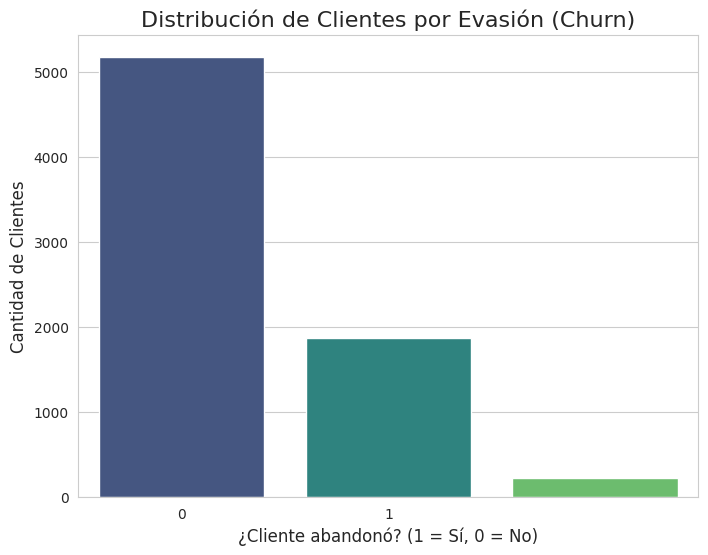

#### **Análisis por Tipo de Contrato**

El tipo de contrato es uno de los predictores más fuertes de la evasión. Los clientes con **contratos mes a mes** tienen una tasa de abandono drásticamente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere que la falta de un compromiso a largo plazo facilita la decisión de cancelar el servicio.

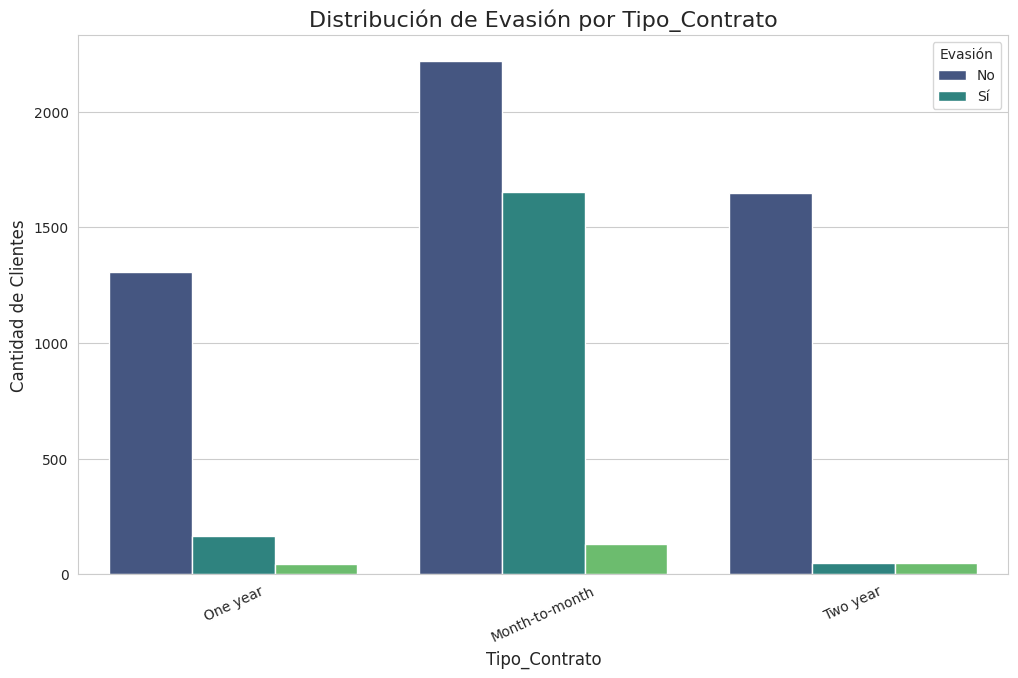
#### **Análisis por Servicio de Internet**

Al analizar el tipo de servicio de internet, se encontró un patrón interesante: los clientes con **Fibra Óptica** presentan una tasa de evasión más alta que los clientes con DSL. Aunque la fibra óptica es un servicio premium, esto podría indicar problemas de precio, calidad del servicio o expectativas no cumplidas que llevan a la insatisfacción.

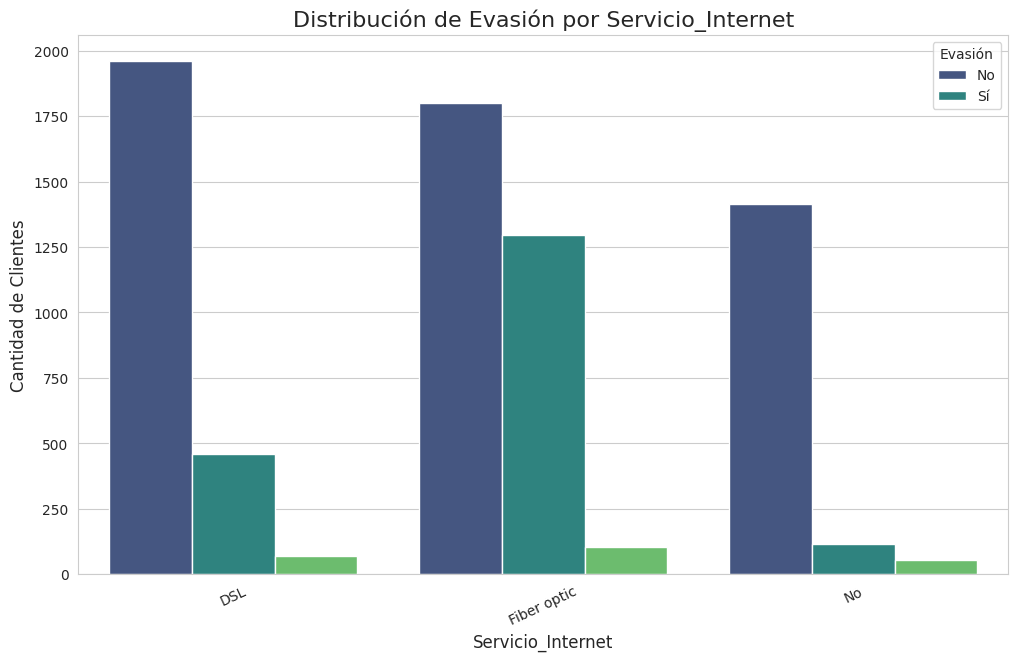

#### **Análisis por Método de Pago**

El método de pago también revela información valiosa. Los clientes que utilizan **cheque electrónico (Electronic check)** como método de pago son mucho más propensos a abandonar la compañía. Esto podría deberse a que este método es menos "automático" y requiere una decisión activa de pago cada mes, dando al cliente una oportunidad recurrente para reconsiderar el servicio.

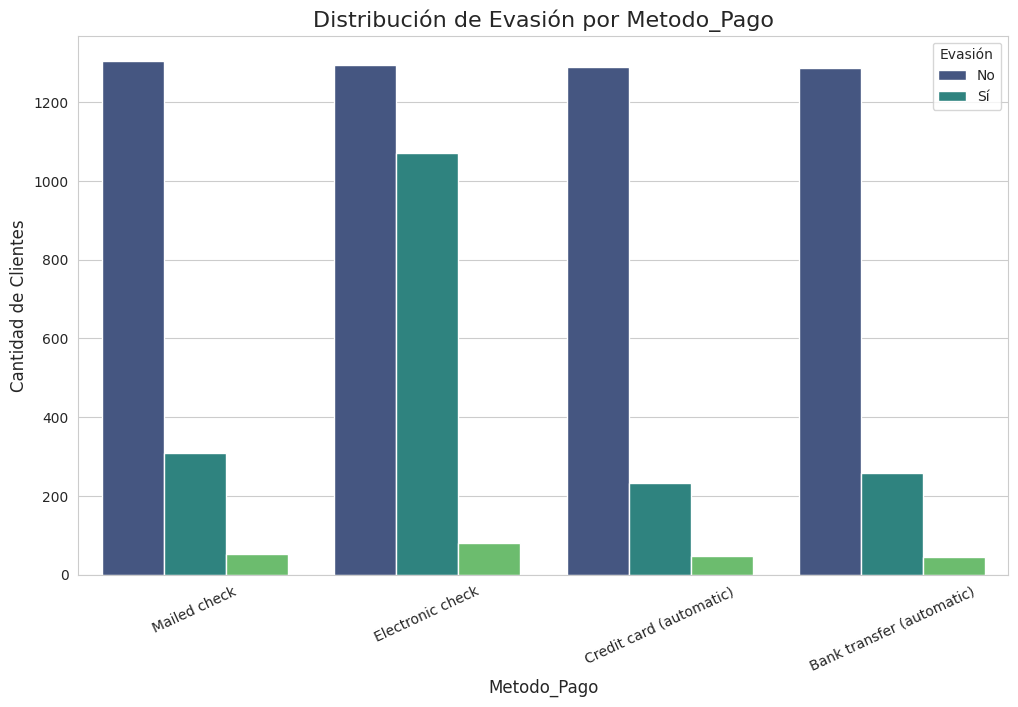

#### **Análisis de Variables Numéricas**

* **Meses de Contrato (Antigüedad):** Existe una clara relación inversa entre la antigüedad del cliente y la probabilidad de evasión. Los clientes más nuevos (con pocos meses de contrato) son los que abandonan con mayor frecuencia. La lealtad aumenta significativamente con el tiempo.

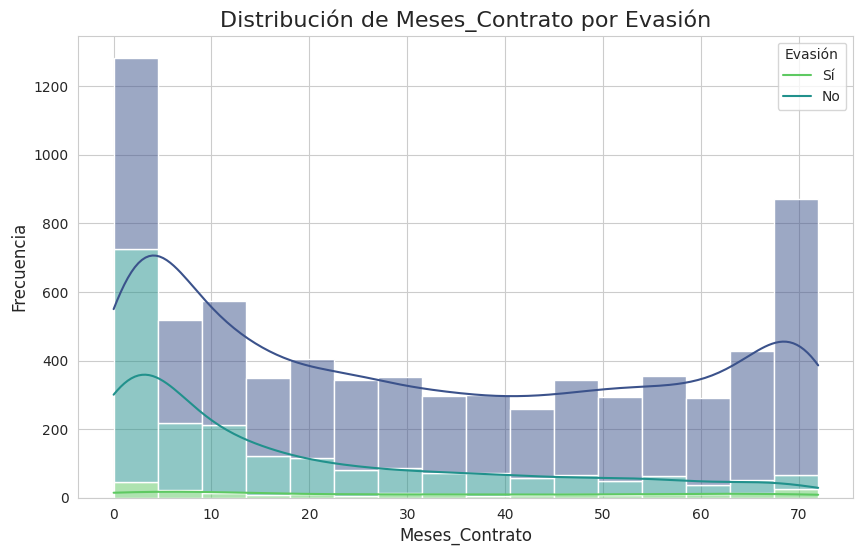
* **Facturación Mensual y Total:**
    * Los clientes que abandonan tienden a tener una **facturación mensual más alta**.
    * Por el contrario, los clientes que abandonan suelen tener **cargos totales (TotalCharges) más bajos**, lo cual es coherente con su corta antigüedad en la empresa.


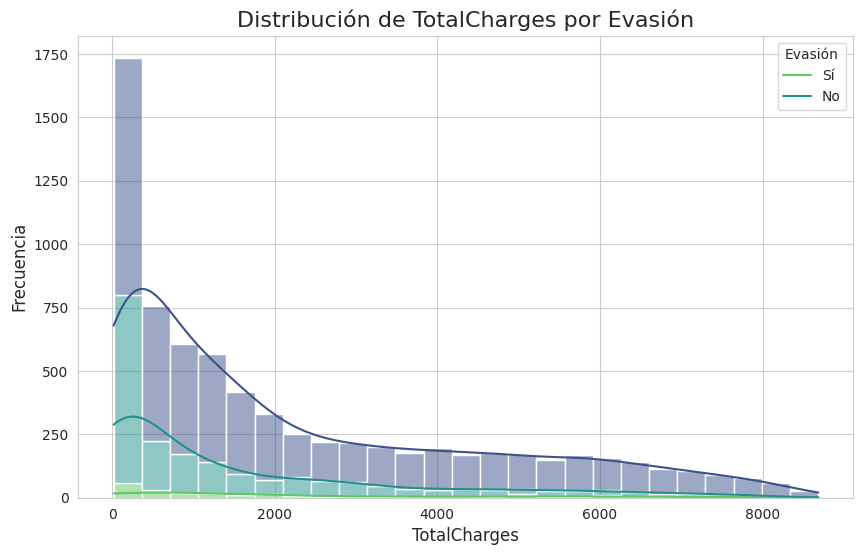


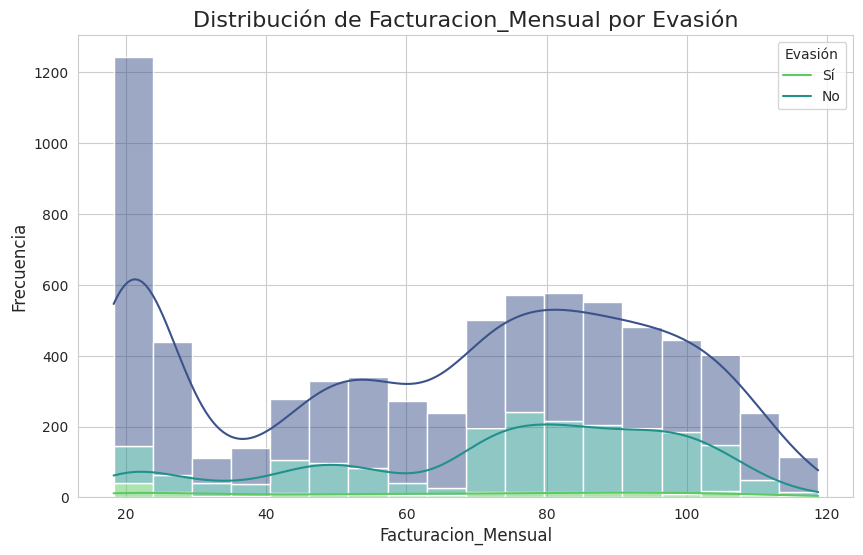

#### **Matriz de Correlación**

El mapa de calor de correlaciones confirma visualmente los hallazgos anteriores. Las variables con la correlación más fuerte (positiva o negativa) con la **Evasión** son:
* **Correlación negativa fuerte:** `Meses_Contrato`. A más meses, menor evasión.
* **Correlación positiva:** `Facturacion_Mensual`, y las variables asociadas a contratos mes a mes y servicio de fibra óptica.

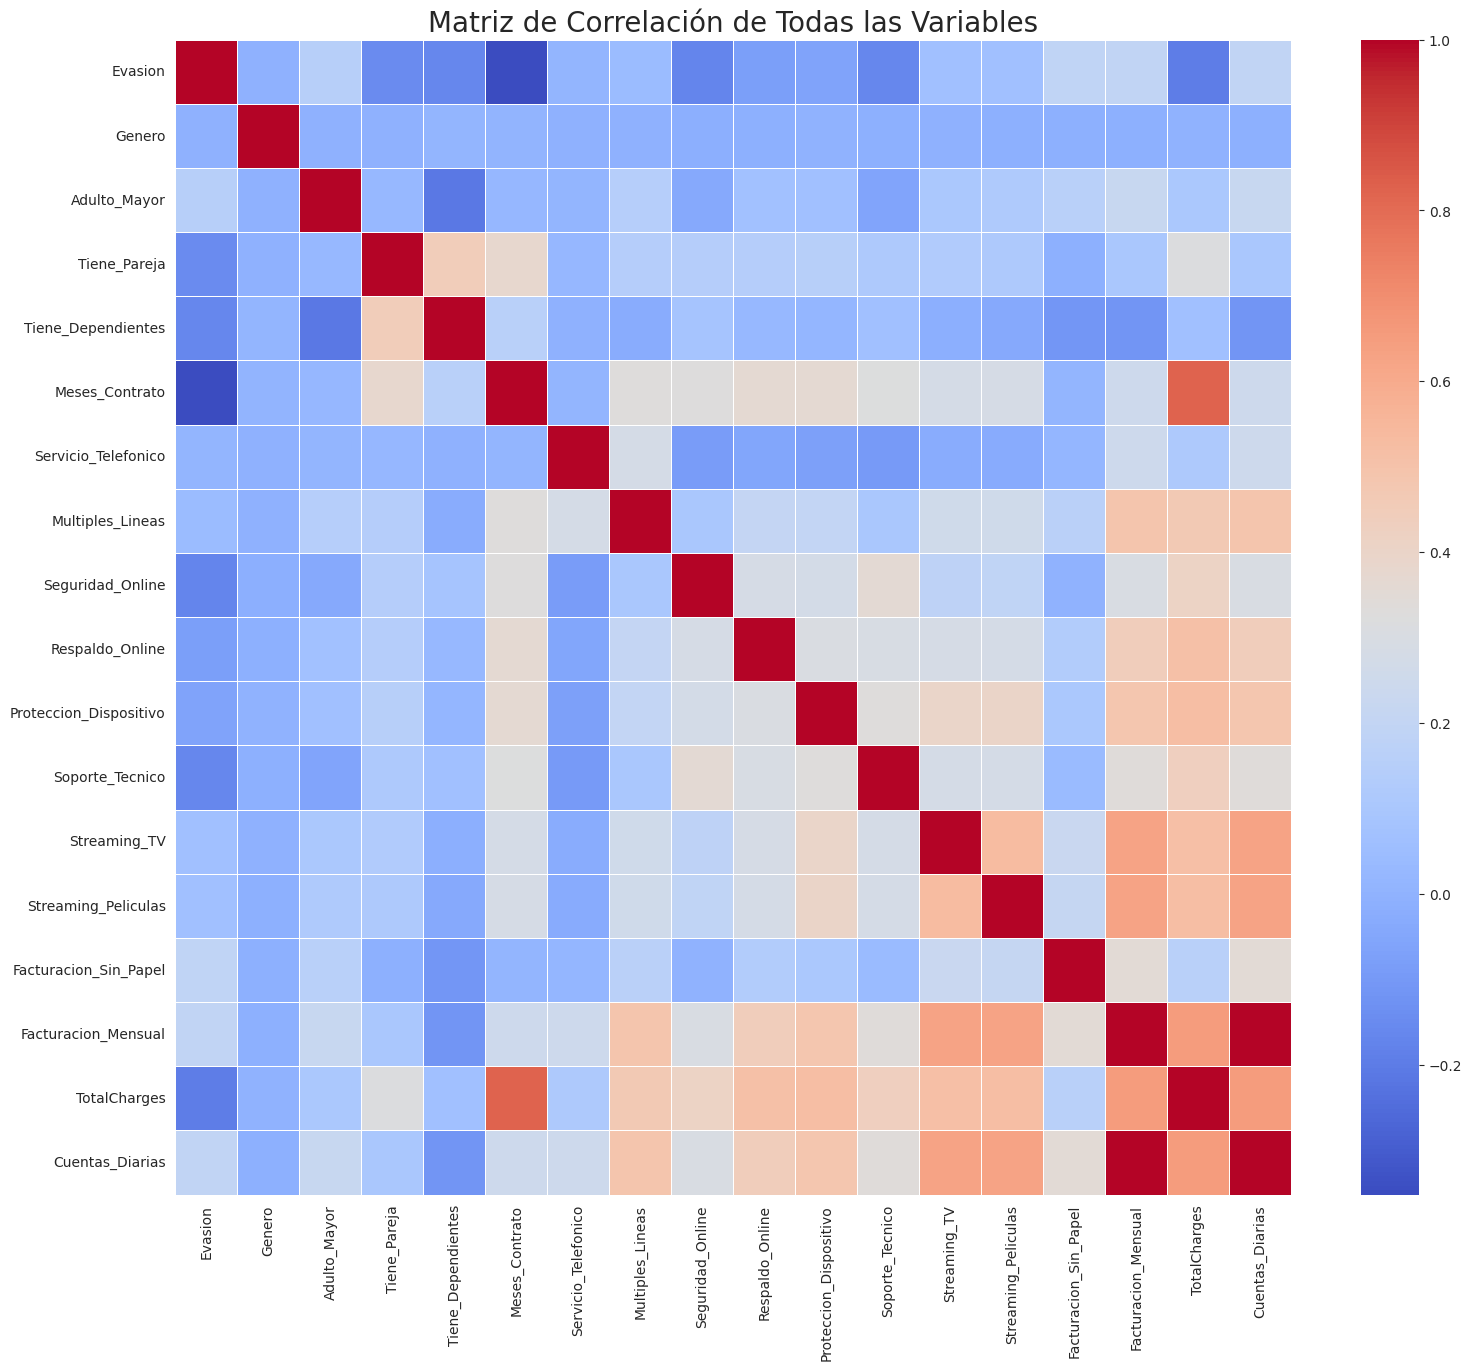

### 🔹 **Conclusiones e Insights**

El análisis nos permite perfilar al cliente con mayor riesgo de evasión:

> Un **cliente nuevo**, con un **contrato mes a mes**, que paga mediante **cheque electrónico** y tiene contratado el servicio de **Fibra Óptica** con una **facturación mensual elevada**.

La combinación de un compromiso bajo (mes a mes) y un costo mensual alto parece ser el principal motor del churn. Los primeros meses son críticos para la retención del cliente.

### 🔹 **Recomendaciones Estratégicas**

Basado en los hallazgos, se proponen las siguientes acciones para reducir la tasa de evasión:

1.  **Fomentar Contratos a Largo Plazo:** Crear campañas y ofrecer incentivos atractivos (descuentos, servicios adicionales gratuitos) para que los clientes con contratos mes a mes migren a planes de 1 o 2 años.
2.  **Revisar la Oferta de Fibra Óptica:** Investigar las causas de la alta evasión en este segmento. ¿Es el precio? ¿La estabilidad del servicio? ¿El soporte técnico? Realizar encuestas de satisfacción a estos clientes podría aclarar el problema.
3.  **Incentivar Pagos Automáticos:** Promover métodos de pago automáticos (tarjeta de crédito, transferencia bancaria) ofreciendo pequeños descuentos o beneficios. Esto reduce los puntos de fricción mensuales y la reconsideración del servicio.
4.  **Programas de Lealtad para Clientes Nuevos:** Implementar un programa de bienvenida y seguimiento durante los primeros 3 a 6 meses, ofreciendo soporte proactivo, descuentos especiales o contenido de valor para fortalecer la relación y superar el período crítico de mayor riesgo de churn.
5.  **Ofertas de Retención Personalizadas:** Utilizar los datos para identificar proactivamente a los clientes en riesgo y ofrecerles planes de retención personalizados antes de que decidan cancelar, como un descuento temporal en su facturación mensual.

Este informe proporciona una base sólida para que el equipo de ciencia de datos desarrolle modelos predictivos de churn y para que la empresa diseñe estrategias de retención más efectivas y basadas en datos.